# Exploratory Data Analysis
## Import and cleanse data

In [3]:
import pandas as pd
from pandas.io.json import json_normalize
import json

path = './data/fixtures.json'
with open(path) as data:
    fixtures = json.load(data)

fixtures = json_normalize(fixtures)
df = pd.DataFrame(fixtures)

ballast = ['competition.gsm_id', 'competition.name', 'gsm_id', 'season.gsm_id',
           'team1.gsm_id', 'team2.gsm_id']

df.drop(ballast, axis=1, inplace=True)

columns = ['week', 'ft_score_1', 'ft_score_2', 'ht_score_1', 'ht_score_2',
           'kick_off', 'season', 'team_1', 'team_2']

df.columns = columns

df['kick_off'].astype('datetime64')

df

,week,ft_score_1,ft_score_2,ht_score_1,ht_score_2,kick_off,season,team_1,team_2
0,19,3,1,1,0,2010-12-27,2010/2011,Arsenal,Chelsea
1,35,0,0,0,0,2012-04-21,2011/2012,Arsenal,Chelsea
2,6,1,2,1,1,2012-09-29,2012/2013,Arsenal,Chelsea
3,17,0,0,0,0,2013-12-23,2013/2014,Arsenal,Chelsea
4,34,0,0,0,0,2015-04-26,2014/2015,Arsenal,Chelsea
5,35,1,0,0,0,2011-05-01,2010/2011,Arsenal,Manchester United
6,22,1,2,0,1,2012-01-22,2011/2012,Arsenal,Manchester United
7,35,1,1,1,1,2013-04-28,2012/2013,Arsenal,Manchester United
8,26,0,0,0,0,2014-02-12,2013/2014,Arsenal,Manchester United
9,12,1,2,0,0,2014-11-22,2014/2015,Arsenal,Manchester United


## Summary Statistics

In [2]:
# Arsenal Fixtures
# All fixtures with Arsenal sorted by kick_off, with 'goals' containing
# the fulltime goal score of Arsenal
# 38 games per season
af = df[((df['team_1'] == 'Arsenal') | (df['team_2'] == 'Arsenal')) & (df['season'] == '2014/2015')]
af.sort_values(by = 'kick_off') # TODO: sort by kick off date
af = af.reset_index()

af.loc[af['team_1'] == 'Arsenal', 'goals'] = af['ft_score_1']
af.loc[af['team_2'] == 'Arsenal', 'goals'] = af['ft_score_2']

af

,index,week,ft_score_1,ft_score_2,ht_score_1,ht_score_2,kick_off,season,team_1,team_2,goals
0,4,34,0,0,0,0,2015-04-26,2014/2015,Arsenal,Chelsea,0
1,9,12,1,2,0,0,2014-11-22,2014/2015,Arsenal,Manchester United,1
2,14,31,4,1,3,0,2015-04-04,2014/2015,Arsenal,Liverpool,4
3,19,16,4,1,1,0,2014-12-13,2014/2015,Arsenal,Newcastle United,4
4,24,23,5,0,1,0,2015-02-01,2014/2015,Arsenal,Aston Villa,5
5,34,14,1,0,0,0,2014-12-03,2014/2015,Arsenal,Southampton,1
6,41,27,2,0,1,0,2015-03-01,2014/2015,Arsenal,Everton,2
7,46,6,1,1,0,0,2014-09-27,2014/2015,Arsenal,Tottenham Hotspur,1
8,51,4,2,2,0,1,2014-09-13,2014/2015,Arsenal,Manchester City,2
9,59,38,4,1,4,0,2015-05-24,2014/2015,Arsenal,West Bromwich Albion,4


/Library/Python/2.7/site-packages/ggplot/ggplot.py:181: RuntimeWarning: Setting "mpl.rcParams['axes.grid']=True" raised an Exception: Could not convert "True" to boolean
  warnings.warn(msg, RuntimeWarning)
/Library/Python/2.7/site-packages/ggplot/ggplot.py:181: RuntimeWarning: Setting "mpl.rcParams['lines.antialiased']=True" raised an Exception: Could not convert "True" to boolean
  warnings.warn(msg, RuntimeWarning)
/Library/Python/2.7/site-packages/ggplot/ggplot.py:181: RuntimeWarning: Setting "mpl.rcParams['figure.figsize']=11, 8" raised an Exception: 
  warnings.warn(msg, RuntimeWarning)
/Library/Python/2.7/site-packages/ggplot/ggplot.py:181: RuntimeWarning: Setting "mpl.rcParams['axes.axisbelow']=True" raised an Exception: Could not convert "True" to boolean
  warnings.warn(msg, RuntimeWarning)
/Library/Python/2.7/site-packages/ggplot/ggplot.py:181: RuntimeWarning: Setting "mpl.rcParams['patch.antialiased']=True" raised an Exception: Could not convert "True" to boolean
  warnings

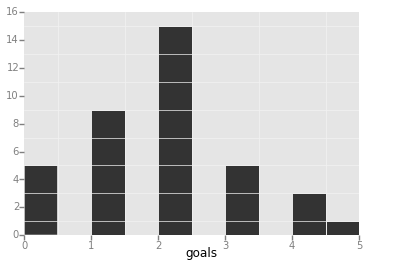

<ggplot: (270313921)>

In [3]:
from ggplot import *

%matplotlib inline

p = ggplot(aes(x='goals'), data=af)
p + geom_histogram()

## Export Data Season 2014/2015 for PyMC3

In [3]:
s1415 = df[(df['season'] == '2014/2015')]
s1314 = df[(df['season'] == '2013/2014')]

s1415 = s1415.reset_index()
s1314 = s1314.reset_index()

ballast = ['index', 'week', 'ht_score_1', 'ht_score_2', 'kick_off', 'season']

s1415.drop(ballast, axis=1, inplace=True)
s1314.drop(ballast, axis=1, inplace=True)

columns = ['home_score', 'away_score', 'home_team', 'away_team']

s1415.columns = columns
s1314.columns = columns

s1314

,home_score,away_score,home_team,away_team
0,0,0,Arsenal,Chelsea
1,0,0,Arsenal,Manchester United
2,2,0,Arsenal,Liverpool
3,3,0,Arsenal,Newcastle United
4,1,3,Arsenal,Aston Villa
5,2,0,Arsenal,Fulham
6,2,0,Arsenal,Southampton
7,1,1,Arsenal,Everton
8,1,0,Arsenal,Tottenham Hotspur
9,1,1,Arsenal,Manchester City


In [4]:
# s1415.to_csv('/Users/moe/Development/busics/thesis/notebooks/data/s14-15.csv')
s1314.to_csv('/Users/moe/Development/busics/thesis/notebooks/data/s13-14.csv')

## Export time series data for season 2014/2015

In [7]:
ts1415 = df[(df['season'] == '2014/2015')]
ts1415 = ts1415.reset_index()

ballast = ['index', 'week', 'ht_score_1', 'ht_score_2', 'season']

ts1415.drop(ballast, axis=1, inplace=True)

columns = ['home_score', 'away_score', 'kick_off', 'home_team', 'away_team']

ts1415.columns = columns

ts1415.sort_values(by='kick_off')

,home_score,away_score,kick_off,home_team,away_team
290,0,1,2014-08-16,Stoke City,Aston Villa
56,1,2,2014-08-16,Manchester United,Swansea City
274,0,1,2014-08-16,West Ham United,Tottenham Hotspur
10,2,1,2014-08-16,Arsenal,Crystal Palace
340,0,1,2014-08-16,Queens Park Rangers,Hull City
235,2,2,2014-08-16,Leicester City,Everton
202,2,2,2014-08-16,West Bromwich Albion,Sunderland
62,2,1,2014-08-17,Liverpool,Southampton
84,0,2,2014-08-17,Newcastle United,Manchester City
305,1,3,2014-08-18,Burnley,Chelsea


In [8]:
ts1415.to_csv('./data/ts14-15.csv')

## Export multiple seasons

In [7]:
mult = df[(df['season'] == '2014/2015') | (df['season'] == '2013/2014')]
mult = mult.reset_index()

ballast = ['index', 'week', 'ht_score_1', 'ht_score_2', 'season']

mult.drop(ballast, axis=1, inplace=True)

columns = ['home_score', 'away_score', 'kick_off', 'home_team', 'away_team']

mult.columns = columns

mult.sort_values(by='kick_off')

,home_score,away_score,kick_off,home_team,away_team
582,2,0,2013-08-17,West Ham United,Cardiff City
431,0,1,2013-08-17,West Bromwich Albion,Southampton
525,0,1,2013-08-17,Sunderland,Fulham
8,1,3,2013-08-17,Arsenal,Aston Villa
726,1,4,2013-08-17,Swansea City,Manchester United
407,2,2,2013-08-17,Norwich City,Everton
143,1,0,2013-08-17,Liverpool,Stoke City
72,2,0,2013-08-18,Chelsea,Hull City
473,0,1,2013-08-18,Crystal Palace,Tottenham Hotspur
369,4,0,2013-08-19,Manchester City,Newcastle United


In [8]:
mult.to_csv('./data/mult14-16.csv')